In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import model_selection

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
URL = "https://raw.githubusercontent.com/RuviniB/Master_Project/main/Processed_Training8.csv"

In [ ]:
tweets = pd.read_csv(URL)

In [ ]:
tweets['encode_label']=tweets['Category'].apply(lambda x: 1 if x=='yes' else 0)
tweets.sample(5)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,Disease,Category,location,bbox,normalized_tweet,preprocessed_tweet,encode_label
322,8.052182e+06,2021-12-28 11:20:49+00:00,1f36c2b60fbc98ac,1.480000e+18,en,4,0,1,0,Twitter for Android,I've just suffered my fourth bout of Shingl...,Shingles,yes,"Swansea, Wales","[-4.029331, 51.5987484, -3.8621388, 51.68983]","['suffered', 'fourth', 'bout', 'shingle', 'yea...",suffered fourth bout shingles years chickenpox...,1
102,4.149481e+09,2021-04-18 20:44:40+00:00,60160252aeb7e3e5,1.380000e+18,en,1,0,0,0,Twitter for Android,Long covid the real name is post viral traum...,NaN,no,"West Midlands, England","[-3.23560072135158, 51.8259029271059, -1.17213...","['real', 'name', 'post', 'viral', 'trauma', 'p...",long covid real name post viral trauma part n ...,0
289,1.131228e+09,2021-10-17 09:40:12+00:00,477b54bb4fc386a8,1.450000e+18,en,1,0,1,0,Twitter for iPhone,SheÃ¢â‚¬â„¢s had them since diagnosis has too...,NaN,no,"Dudley, England","[-2.191695, 52.429765, -2.057189, 52.557702]","['since', 'diagnosis', 'near', 'chickenpox', '...",since diagnosis near chickenpox shingles live ...,0
295,1.160000e+18,2021-11-29 13:56:28+00:00,071b7c1bd7a4d674,1.470000e+18,en,1,0,0,0,Twitter for iPhone,Thx for always asking my sweetheart! Go...,flu,yes,"Saint Margarets, East","[-0.020854, 51.779096, 0.019293, 51.7963833]","['always', 'asking', 'sweetheart', 'good', 'ok...",thx always asking sweetheart good ok flu mild ...,1
198,1.286797e+08,2021-07-17 00:59:26+00:00,55274794874e883d,1.420000e+18,en,0,0,0,0,Twitter for Android,Norovirus warning as bug spreads in England af...,Norovirus,yes,"Stockport, England","[-2.215529, 53.374446, -2.095752, 53.454771]","['bug', 'spread', 'england', 'lockdown', 'eased']",norovirus warning bug spreads england lockdown...,1


In [ ]:
import pandas as pd

df = pd.read_csv(URL)
df.head(5)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,Disease,Category,location,bbox,normalized_tweet,preprocessed_tweet
0,8.847627e+07,2021-01-30 23:27:51+00:00,0af014accd6f6e99,1.360000e+18,en,2,0,0,0,Twitter for iPhone,"Also, spoongate and highlightergate took me p...",NaN,no,"Scotland, United Kingdom","[-7.66085699743185, 54.6336309570711, -0.74002...","['highlightergate', 'took', 'perilously', 'clo...",also spoongate highlightergate took perilously...
1,2.212480e+09,2021-01-30 23:22:42+00:00,544762ebf7fda780,1.360000e+18,en,0,0,1,0,Twitter for Android,But spreading the vaccine more thinly acro...,NaN,no,"Islington, London","[-0.1420579, 51.5185518, -0.076305, 51.575301]","['vaccine', 'thinly', 'across', 'country', 'op...",spreading vaccine thinly across countries oppo...
2,2.180468e+07,2021-01-30 23:21:37+00:00,0282e03e23c71cd9,1.360000e+18,en,0,0,0,0,Twitter for iPhone,You read my mind!,NaN,no,"Walberton, England","[-0.649321, 50.842058, -0.613803, 50.857136]",['mind'],read mind
3,3.368075e+09,2021-01-30 23:17:59+00:00,6950c01e141ecebc,1.360000e+18,en,2,0,0,0,Twitter for iPhone,The fact sea shanties are viral on tiktok has ...,NaN,no,"Pendeen, England","[-5.672772, 50.147916, -5.650931, 50.155494]","['sea', 'shanty', 'viral', 'tiktok', 'made', '...",fact sea shanties viral tiktok made heart happ...
4,1.170000e+18,2021-01-30 23:11:52+00:00,3e20eaf0dc70acfe,1.360000e+18,en,0,0,0,0,Twitter for Android,good evening guys Ã¢ÂÂ¤Ã¯Â¸Â I miss you....,NaN,no,"Stockton-on-Tees, England","[-1.372296, 54.538762, -1.2717038, 54.600693]","['guy', 'miss', 'virus', 'never', 'get', 'u', ...",good evening guys miss virus never get us back...


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(tweets["normalized_tweet"], tweets["encode_label"], stratify=None, test_size=0.2)

In [ ]:
X_train.head()

742    ['hell', 'virus', 'crazy', 'bill', 'plan', 'lo...
531    ['much', 'difference', 'got', 'many', 'friend'...
599    ['public', 'health', 'consensus', 'statement',...
242    ['good', 'bad', 'gut', 'leg', 'aching', 'sort'...
279    ['husband', 'mum', 'gp', 'got', 'chickenpox', ...
Name: normalized_tweet, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  

tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)  
tfidfconverter.fit(tweets["normalized_tweet"])
X_train = tfidfconverter.transform(X_train)
X_test = tfidfconverter.transform(X_test)

In [ ]:
### Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
rf_classifier.fit(X_train, y_train)
 
rf_predictions = rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,rf_predictions))  
print(classification_report(y_test,rf_predictions))  
print("Random Forest Accuracy --> ", accuracy_score(y_test, rf_predictions)*100)

[[99 10]
 [12 79]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       109
           1       0.89      0.87      0.88        91

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

Random Forest Accuracy -->  89.0


In [ ]:
print("Random Forest f1-score -->",f1_score(y_test, rf_predictions)*100)
print("Random Forest precission_score -->",precision_score(y_test, rf_predictions)*100)
print("Random Forest recall_score -->",recall_score(y_test, rf_predictions)*100)

Random Forest f1-score --> 87.77777777777777
Random Forest precission_score --> 88.76404494382022
Random Forest recall_score --> 86.81318681318682


In [ ]:
 import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


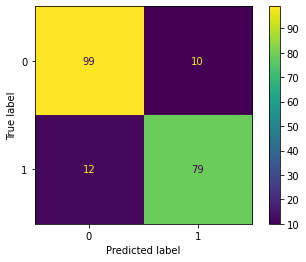

In [ ]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)
RandomForestClassifier(random_state=0)
plot_confusion_matrix(clf3, X_test, y_test)  
plt.show()

In [ ]:
### SVM

In [ ]:
#SVM
from sklearn.svm import SVC

svm_classifier = SVC(kernel="linear")
svm_classifier.fit(X_train, y_train)

svm_predictions = svm_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,svm_predictions))  
print(classification_report(y_test,svm_predictions))  

print("SVM Accuracy -->",accuracy_score(y_test, svm_predictions)*100)

[[96 13]
 [ 8 83]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       109
           1       0.86      0.91      0.89        91

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200

SVM Accuracy --> 89.5


In [ ]:
print("SVM f1-score -->",f1_score(y_test, svm_predictions)*100)
print("SVM precision_score -->",precision_score(y_test, svm_predictions)*100)
print("SVM recall_score -->",recall_score(y_test, svm_predictions)*100)

SVM f1-score --> 88.77005347593582
SVM precision_score --> 86.45833333333334
SVM recall_score --> 91.20879120879121


In [ ]:
X_trial = tfidfconverter.transform(tweets["normalized_tweet"])

trial_predict = svm_classifier.predict(X_trial)

tweets["Predict_label"] = trial_predict

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


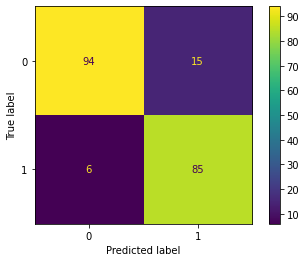

In [ ]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
### Naive Bayes

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

NB_predictions = NB_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,NB_predictions))  
print(classification_report(y_test,NB_predictions))  
print("NB Accuracy -->",accuracy_score(y_test, NB_predictions)*100)

[[85 24]
 [ 9 82]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       109
           1       0.77      0.90      0.83        91

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200

NB Accuracy --> 83.5


In [ ]:
print("NB f1-score -->",f1_score(y_test, NB_predictions)*100)
print("NB precision_score -->",precision_score(y_test, NB_predictions)*100)
print("NB recall_score -->",recall_score(y_test, NB_predictions)*100)

NB f1-score --> 83.24873096446701
NB precision_score --> 77.35849056603774
NB recall_score --> 90.10989010989012


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


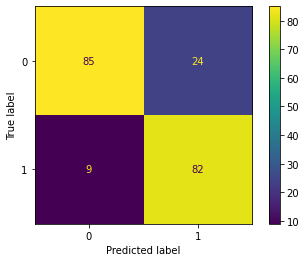

In [ ]:
clf2 = MultinomialNB()
clf2.fit(X_train, y_train)
MultinomialNB()
plot_confusion_matrix(clf2, X_test, y_test)  
plt.show()